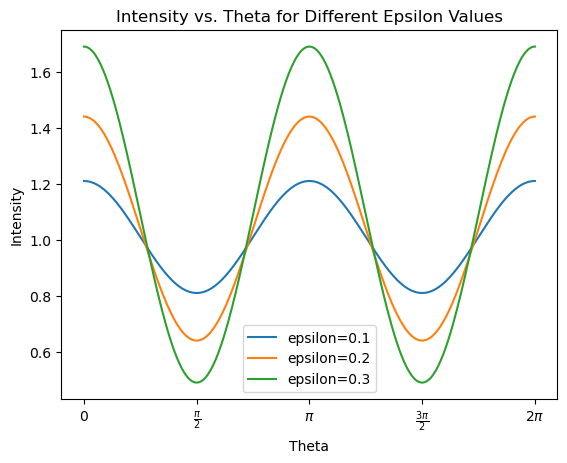

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Jones input matrix
def jones_input(epsilon):
    return np.array([[1 + epsilon, 0],
                    [0, 1 - epsilon]])

# Calculate intensity given Jones output matrix
def calculate_intensity(jones_output):
    return jones_output[0]**2 + jones_output[1]**2

# Parameters
theta_values = np.linspace(0, 2*np.pi, 360)  # Range of theta from 0 to 2pi
epsilon_values = [0.1, 0.2, 0.3]  # Different epsilon values to adjust the graph

# Plotting
for epsilon in epsilon_values:
    intensities = []

    for theta in theta_values:
        R_theta = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
        R_minus_theta = np.array([[np.cos(theta), np.sin(theta)],
                                [-np.sin(theta), np.cos(theta)]])
        
        jones_output = np.dot(np.dot(np.dot(R_minus_theta, jones_input(epsilon)), R_theta) ,
                            np.array([[1], [0]]))
        intensities.append(calculate_intensity(jones_output))

    plt.plot(theta_values, intensities, label=f'epsilon={epsilon}')

#Convert axis from 0-8 to 0-2pi
theta_ticks = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
theta_tick_positions = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

plt.xlabel('Theta')
plt.ylabel('Intensity')
plt.title('Intensity vs. Theta for Different Epsilon Values')
plt.xticks(theta_tick_positions, theta_ticks)
plt.legend()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define Jones input matrix
def jones_input(epsilon):
    return np.array([[1 + epsilon, 0],
                    [0, 1 - epsilon]])

# Half-wave plate matrix
def half_wave_plate(angle):
    return np.array([[np.cos(2 * angle), np.sin(2 * angle)],
                     [np.sin(2 * angle), -np.cos(2 * angle)]])
    

    

# Calculate intensity given Jones output matrix
def calculate_intensity(jones_output):
    return jones_output[0]**2 - jones_output[1]**2

# Interactive sliders for epsilon and phi
epsilon_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='Epsilon:')
phi_slider = widgets.FloatSlider(value=np.pi / 4, min=0.0, max=np.pi, step=np.pi / 180, description='Phi:')


# Values for fixed theta from 0 to 2*pi
theta_values = np.linspace(0, 2 * np.pi, 360)

theta_ticks = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
theta_tick_positions = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

# Function to update the graph
def update_graph(epsilon, phi):
    intensities = []

    for theta in theta_values:
        jones_output = np.dot(np.dot(half_wave_plate(phi/2 + theta), jones_input(epsilon)),
                        np.dot(half_wave_plate(theta), np.array([[1], [0]])))
        intensities.append(calculate_intensity(jones_output))

    plt.figure(figsize=(8, 6))
    plt.plot(theta_values, intensities)
    plt.xlabel('Theta') 
    plt.ylabel('Intensity')
    plt.xticks(theta_tick_positions, theta_ticks)
    plt.title('Intensity vs. Theta')
    plt.show()

# Create interactive widget
widgets.interactive(update_graph, epsilon=epsilon_slider, phi=phi_slider)






interactive(children=(FloatSlider(value=0.1, description='Epsilon:', max=1.0, step=0.01), FloatSlider(value=0.…